# EDA-Schema Minimal Dataset Analysis (Barely pass)


- Dataset: IWLS05
- Physical Design Toolset: OpenROAD
- PDK: skywater 130

---


Import Libraries and Define Auxiliary Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from eda_schema.entity import PHASES
from eda_schema.dataset import Dataset
from eda_schema.db import SQLitePickleDB

DATASET_DIR = "../dataset/dataset_openroad_sky130hd_iwls05"
dataset = Dataset(SQLitePickleDB(DATASET_DIR))

## Netlist Analysis

In [2]:
CIRCUITS = list(dataset.db.get_table_data("netlists", netlist_id="id-000001", phase="global_route").circuit)


order_dict = {v: str(i) for i, v in enumerate(PHASES)}
def sort_df(df):
    df["sort_index"] = df['circuit'] + df['netlist_id'] + df['phase'].map(order_dict)
    df = df.sort_values("sort_index")
    del df["sort_index"]
    return df

def plot_numeric_distributions_with_boxplots(df, log_scale=False):
    """
    Visualize the distribution and boxplot of numeric columns in a four-column layout.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing numeric columns.
    """
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    num_rows = (num_columns + 3) // 3  # Calculate the number of rows needed for a 4-column layout
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(24, num_rows * 6))
    axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        data = df[column].dropna()
        
        if data.nunique() <= 1:
            # Single value column, only plot a boxplot
            axes[i].text(0.5, 0.5, f'All values are {data.iloc[0]}' if len(data) > 0 else 'No data',
                         horizontalalignment='center', verticalalignment='center',
                         transform=axes[i].transAxes)
            axes[i].set_title(f'Distribution and Boxplot of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        else:
            # Histogram and KDE
            log_scale = log_scale and not ((data > 0).any() and (data < 0).any())
            sns.histplot(data, kde=True, ax=axes[i], log_scale=log_scale, bins=25)
            axes[i].set_title(f'Distribution and Boxplot of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency (log scale)' if log_scale else 'Frequency')
        
        # Boxplot (positioned below the histogram)
        ax_box = axes[i].inset_axes([0, -0.3, 1, 0.2])
        sns.boxplot(x=data, ax=ax_box, orient='h')
        ax_box.set_yticks([])
        ax_box.set_xlabel(column)
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

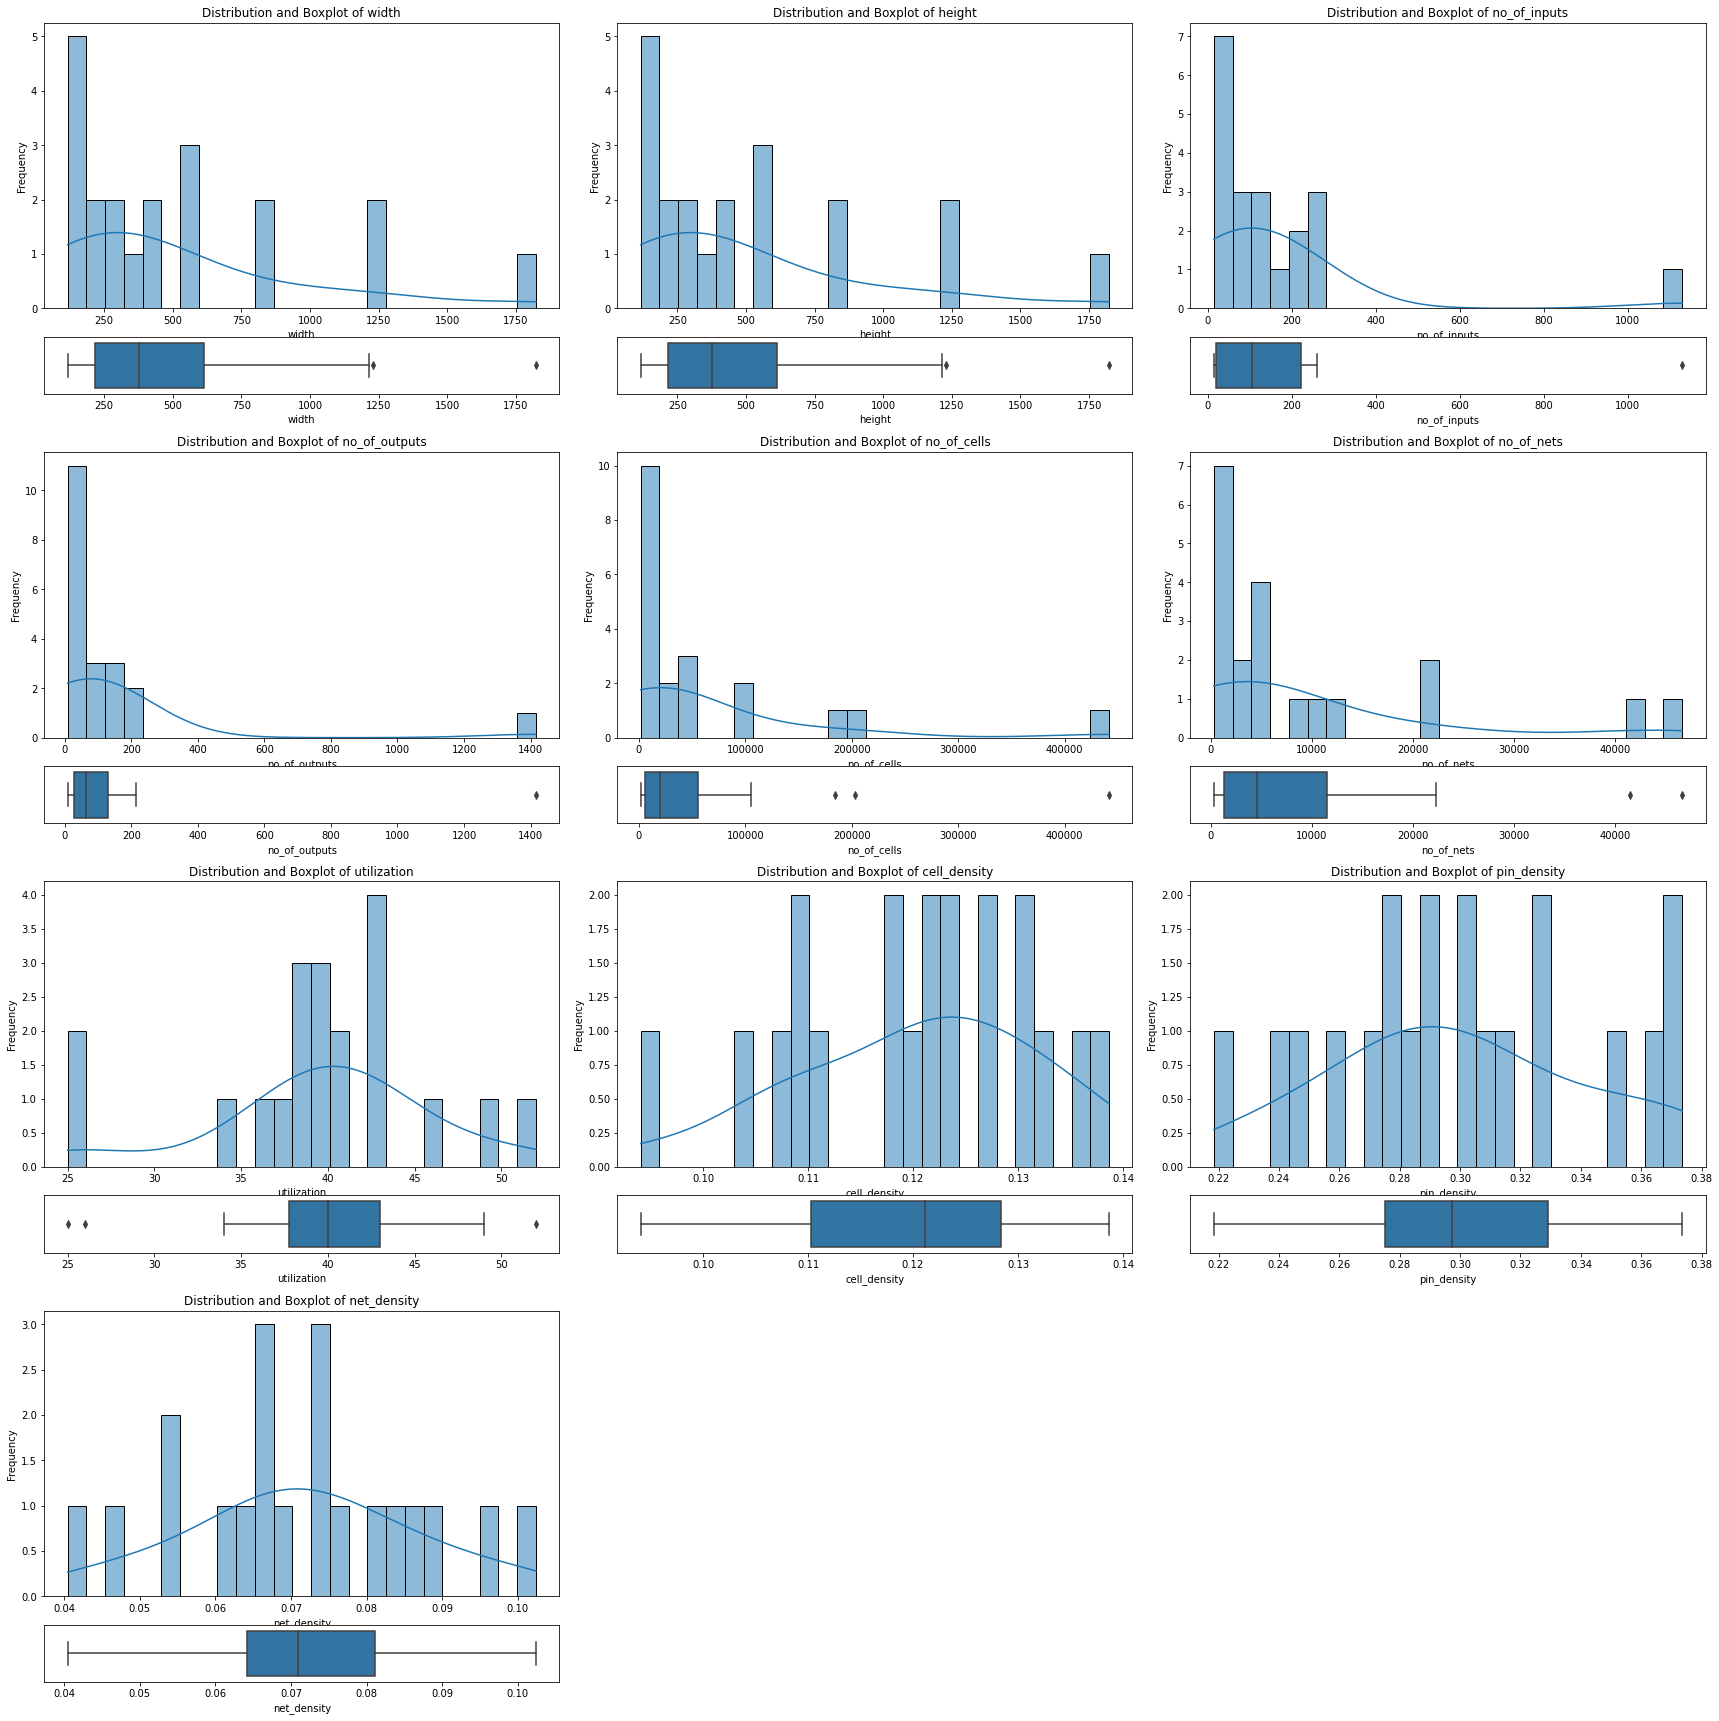

,circuit,netlist_id,phase,width,height,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets,utilization,cell_density,pin_density,net_density
0,ac97_ctrl,id-000001,detailed_route,538.240,538.240,84.0,48.0,36994.0,4799.0,37.0,0.104154,0.241361,0.047056
1,aes_core,id-000001,detailed_route,545.595,545.595,259.0,129.0,43589.0,12773.0,46.0,0.129958,0.373541,0.096943
2,des3_area,id-000001,detailed_route,267.555,267.555,240.0,64.0,10095.0,3518.0,52.0,0.131164,0.373377,0.102404
3,des3_perf,id-000001,detailed_route,1228.860,1228.860,234.0,64.0,202710.0,41477.0,43.0,0.110385,0.279586,0.065209
4,ethernet,id-000001,detailed_route,1213.315,1213.315,96.0,115.0,183965.0,22294.0,38.0,0.094068,0.218456,0.040433
5,i2c,id-000001,detailed_route,157.310,157.310,19.0,14.0,3050.0,642.0,41.0,0.118929,0.305668,0.074418
6,mem_ctrl,id-000001,detailed_route,424.510,424.510,115.0,152.0,24599.0,5124.0,41.0,0.118749,0.302360,0.072757
7,pci,id-000001,detailed_route,822.020,822.020,162.0,207.0,91126.0,11024.0,25.0,0.138674,0.292307,0.066816
8,sasc,id-000001,detailed_route,135.810,135.810,16.0,12.0,2169.0,342.0,40.0,0.107539,0.243691,0.054975
9,simple_spi,id-000001,detailed_route,148.990,148.990,16.0,12.0,2638.0,459.0,40.0,0.109823,0.260829,0.061176


In [3]:
netlist_df = sort_df(dataset.db.get_table_data("netlists", phase="detailed_route"))
plot_numeric_distributions_with_boxplots(netlist_df)
netlist_df

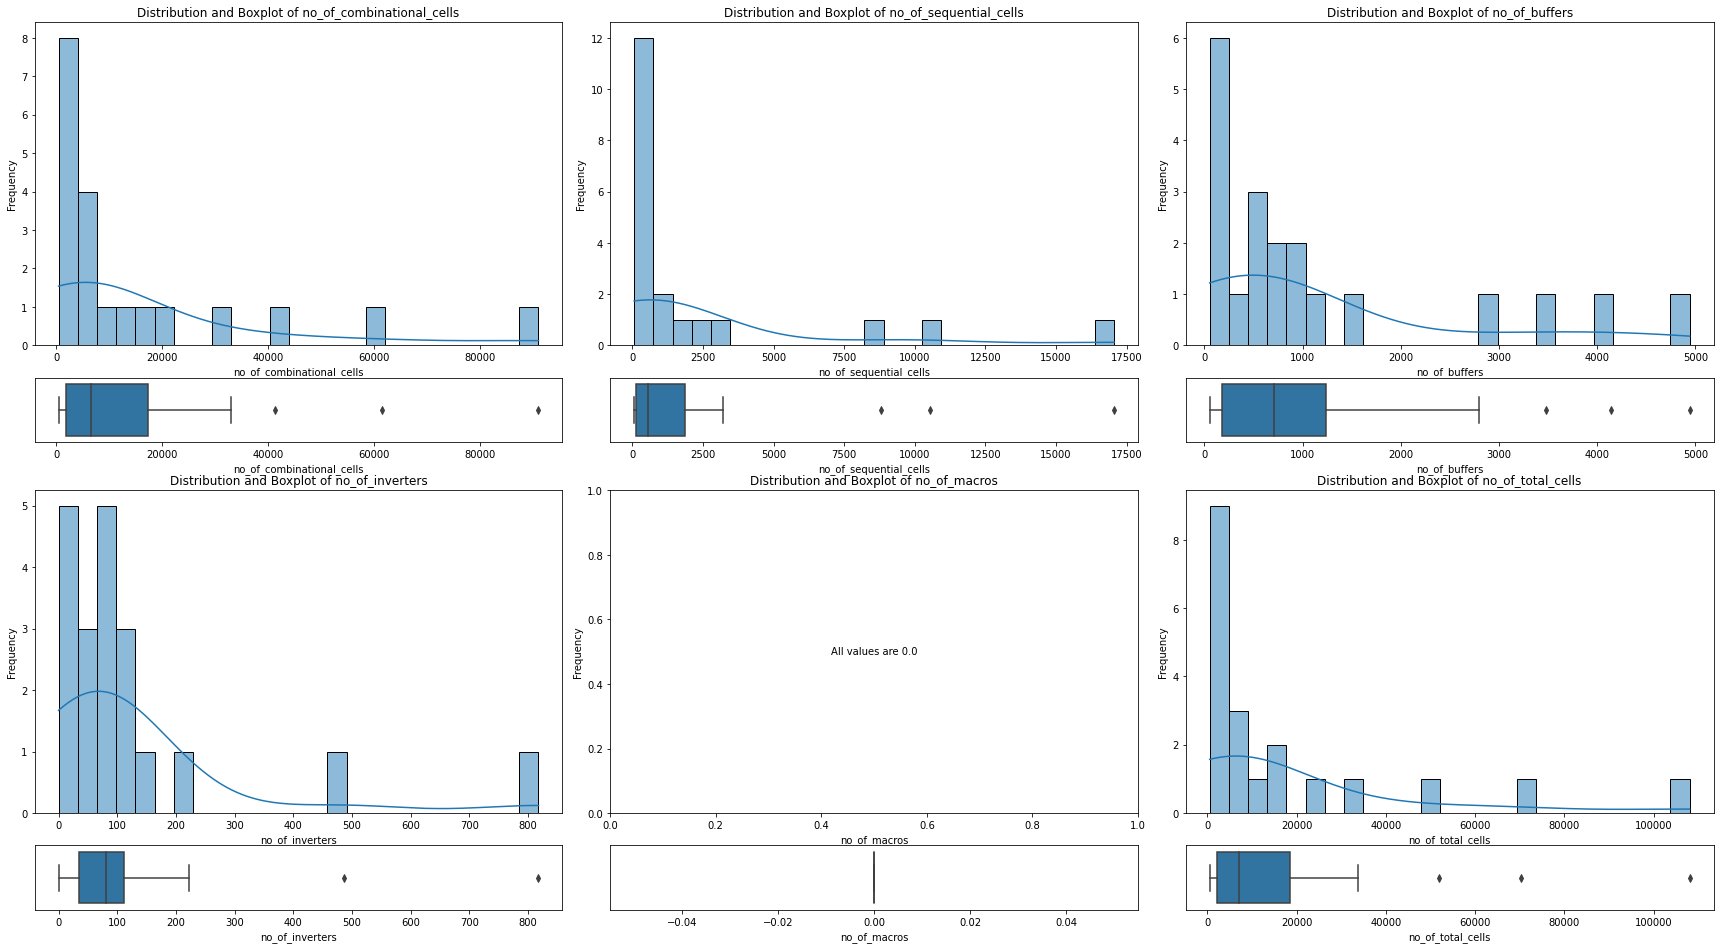

,circuit,netlist_id,phase,no_of_combinational_cells,no_of_sequential_cells,no_of_buffers,no_of_inverters,no_of_macros,no_of_total_cells
0,ac97_ctrl,id-000001,detailed_route,8411.0,2211.0,640.0,84.0,0.0,10622.0
1,aes_core,id-000001,detailed_route,16561.0,562.0,1469.0,127.0,0.0,17123.0
2,des3_area,id-000001,detailed_route,4442.0,64.0,787.0,44.0,0.0,4506.0
3,des3_perf,id-000001,detailed_route,61404.0,8808.0,3484.0,818.0,0.0,70212.0
4,ethernet,id-000001,detailed_route,41323.0,10544.0,2799.0,223.0,0.0,51867.0
5,i2c,id-000001,detailed_route,897.0,129.0,102.0,16.0,0.0,1026.0
6,mem_ctrl,id-000001,detailed_route,7312.0,1051.0,798.0,76.0,0.0,8363.0
7,pci,id-000001,detailed_route,19660.0,3220.0,1165.0,94.0,0.0,22880.0
8,sasc,id-000001,detailed_route,551.0,118.0,70.0,20.0,0.0,669.0
9,simple_spi,id-000001,detailed_route,693.0,131.0,71.0,23.0,0.0,824.0


In [4]:
cell_metric_df = sort_df(dataset.db.get_table_data("cell_metrics", phase="detailed_route"))
plot_numeric_distributions_with_boxplots(cell_metric_df)
cell_metric_df

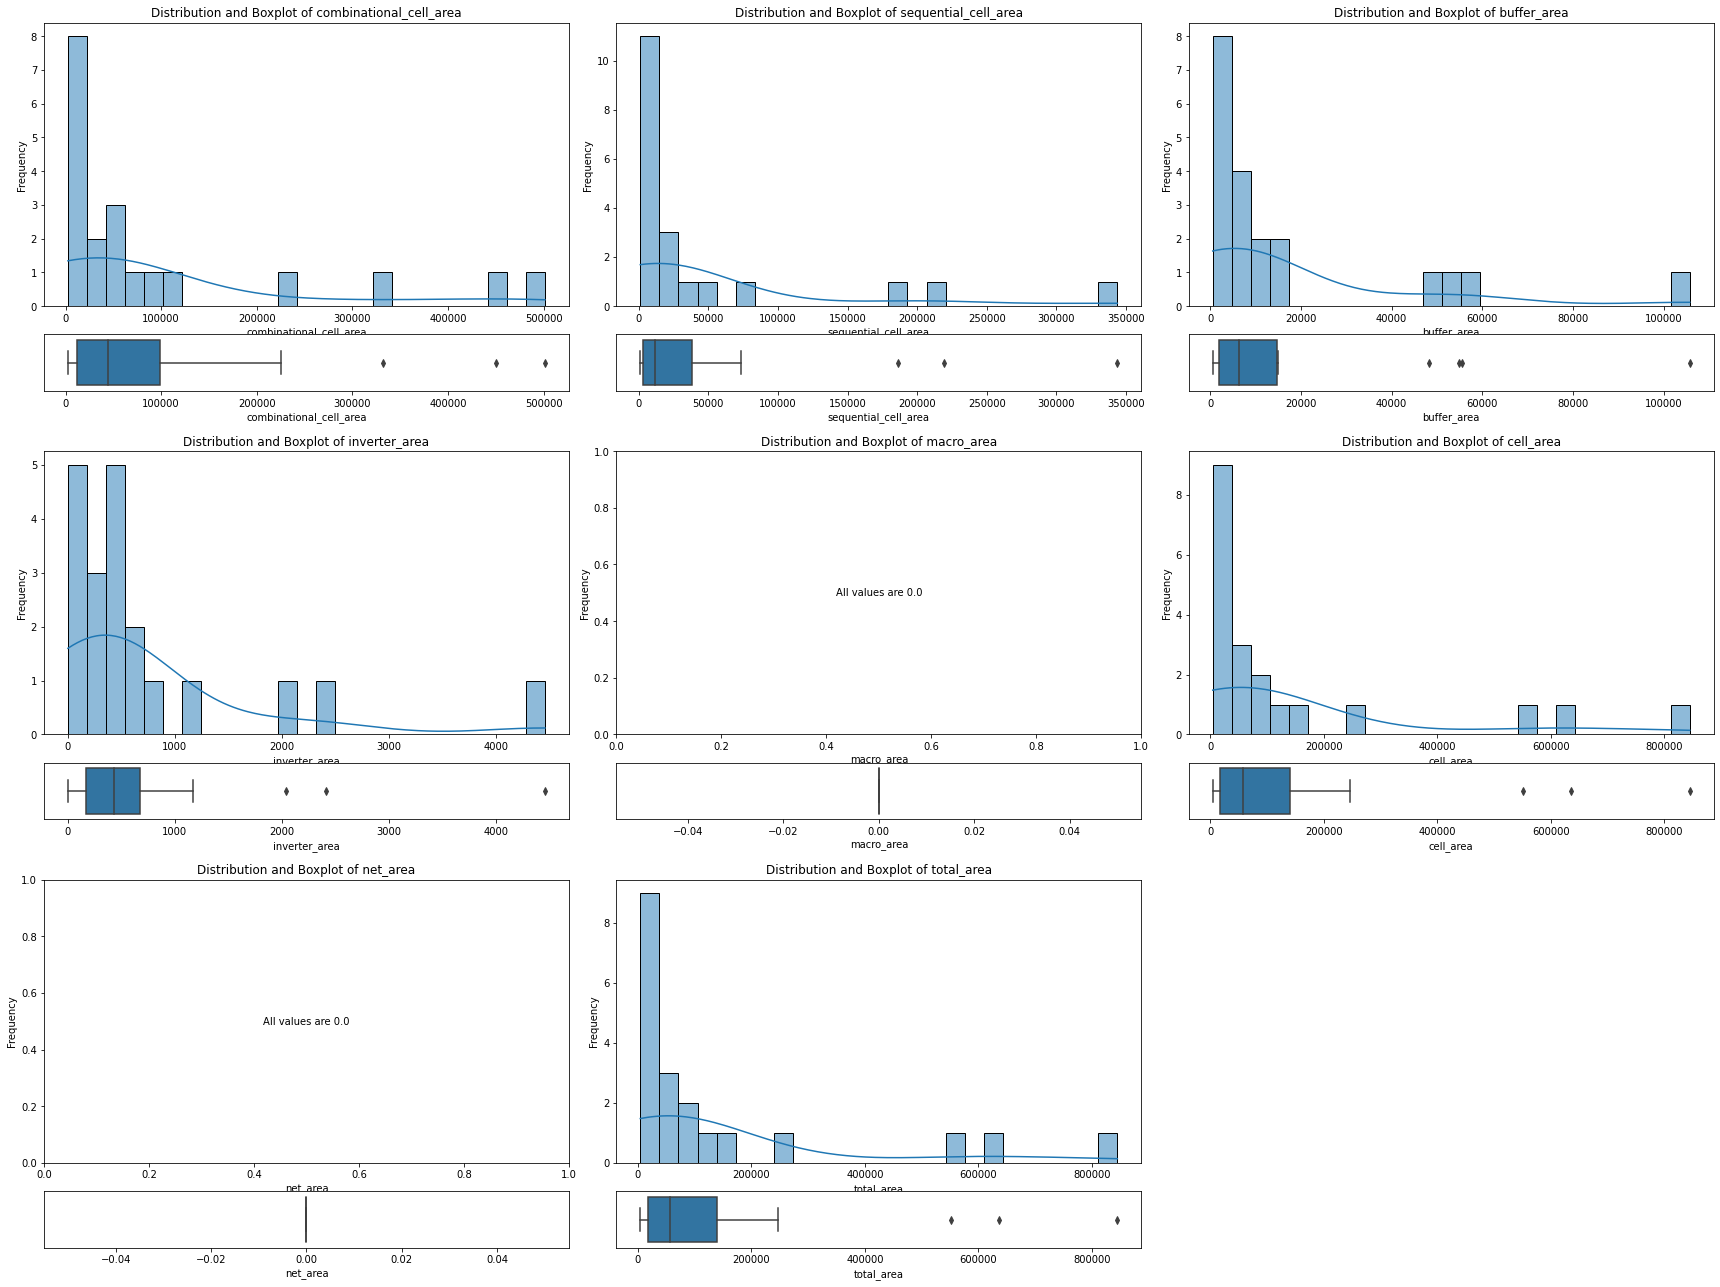

,circuit,netlist_id,phase,combinational_cell_area,sequential_cell_area,buffer_area,inverter_area,macro_area,cell_area,net_area,total_area
0,ac97_ctrl,id-000001,detailed_route,55853.5680,46130.4928,9624.2304,480.4608,0.0,101984.060800,0.0,101984.0
1,aes_core,id-000001,detailed_route,119458.3200,12299.2960,14651.5520,2407.3088,0.0,131757.616000,0.0,131758.0
2,des3_area,id-000001,detailed_route,33066.7136,1287.4848,5292.5760,196.4384,0.0,34354.198400,0.0,34354.0
3,des3_perf,id-000001,detailed_route,449760.1056,186304.9312,48211.2384,4458.0256,0.0,636065.036800,0.0,636065.0
4,ethernet,id-000001,detailed_route,332122.2816,219257.7856,55440.6720,1169.8720,0.0,551380.067200,0.0,551380.0
5,i2c,id-000001,detailed_route,5325.1072,3301.9168,1022.2304,60.0576,0.0,8627.024000,0.0,8627.0
6,mem_ctrl,id-000001,detailed_route,47153.9744,23272.3200,7696.1312,455.4368,0.0,70426.294400,0.0,70426.0
7,pci,id-000001,detailed_route,91646.6464,73344.0928,14978.1152,497.9776,0.0,164990.739200,0.0,164991.0
8,sasc,id-000001,detailed_route,3754.8512,2466.1152,835.8016,75.0720,0.0,6220.966400,0.0,6221.0
9,simple_spi,id-000001,detailed_route,4694.5024,2808.9440,839.5552,100.0960,0.0,7503.446400,0.0,7503.0


In [5]:
area_metric_df = sort_df(dataset.db.get_table_data("area_metrics", phase="detailed_route"))
plot_numeric_distributions_with_boxplots(area_metric_df)
area_metric_df

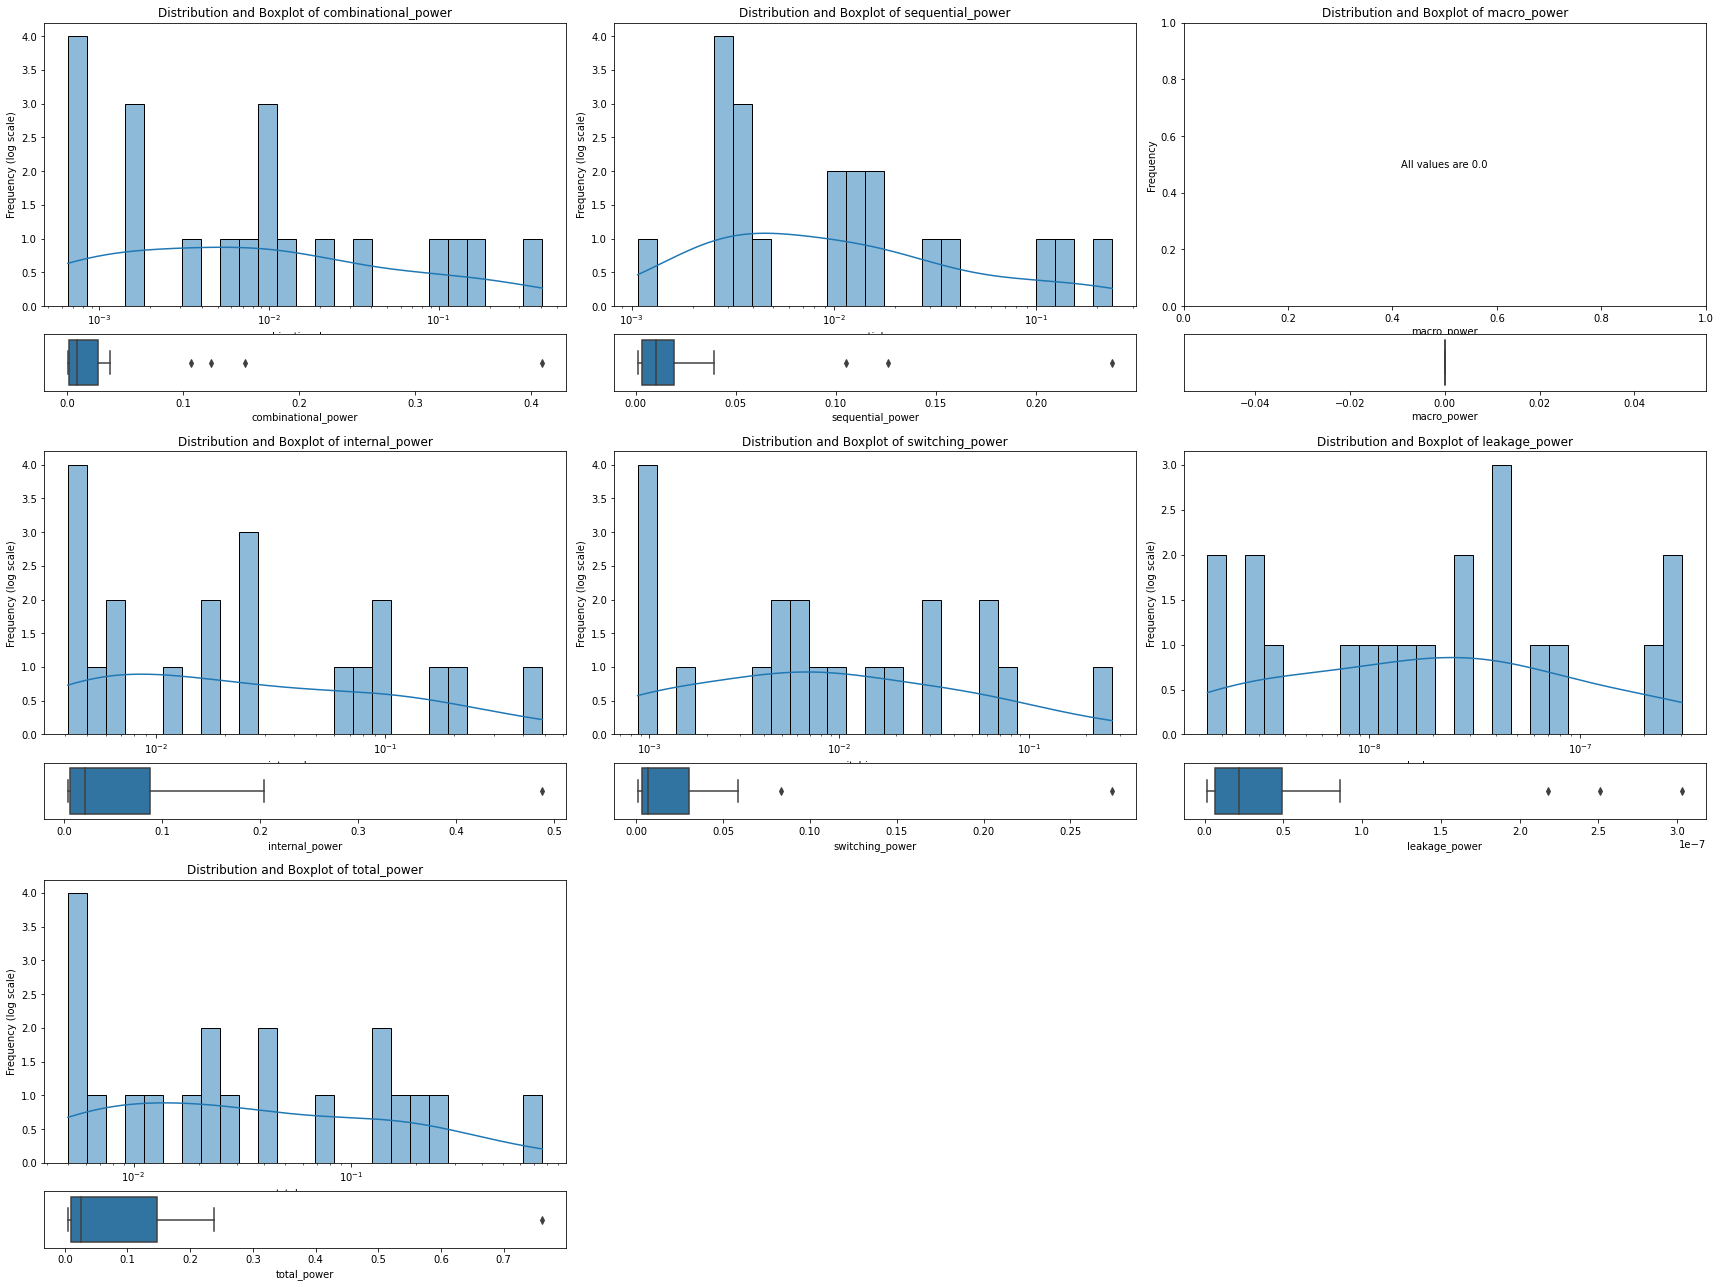

,circuit,netlist_id,phase,combinational_power,sequential_power,macro_power,internal_power,switching_power,leakage_power,total_power
0,ac97_ctrl,id-000001,detailed_route,0.001740,0.03930,0.0,0.06010,0.009560,4.130000e-08,0.06970
1,aes_core,id-000001,detailed_route,0.153000,0.01260,0.0,0.08740,0.083500,4.420000e-08,0.17100
2,des3_area,id-000001,detailed_route,0.009890,0.00107,0.0,0.00650,0.004940,1.220000e-08,0.01140
3,des3_perf,id-000001,detailed_route,0.410000,0.23800,0.0,0.48800,0.274000,2.180000e-07,0.76200
4,ethernet,id-000001,detailed_route,0.009580,0.10500,0.0,0.16600,0.028800,2.510000e-07,0.19500
5,i2c,id-000001,detailed_route,0.000702,0.00292,0.0,0.00470,0.000989,3.560000e-09,0.00569
6,mem_ctrl,id-000001,detailed_route,0.023800,0.01040,0.0,0.02550,0.014000,2.870000e-08,0.03950
7,pci,id-000001,detailed_route,0.001790,0.01540,0.0,0.02440,0.004630,6.470000e-08,0.02910
8,sasc,id-000001,detailed_route,0.001510,0.00360,0.0,0.00564,0.001510,2.630000e-09,0.00715
9,simple_spi,id-000001,detailed_route,0.000774,0.00318,0.0,0.00495,0.001080,3.100000e-09,0.00604


In [6]:
power_metric_df = sort_df(dataset.db.get_table_data("power_metrics", phase="detailed_route"))
plot_numeric_distributions_with_boxplots(power_metric_df, log_scale=True)
power_metric_df

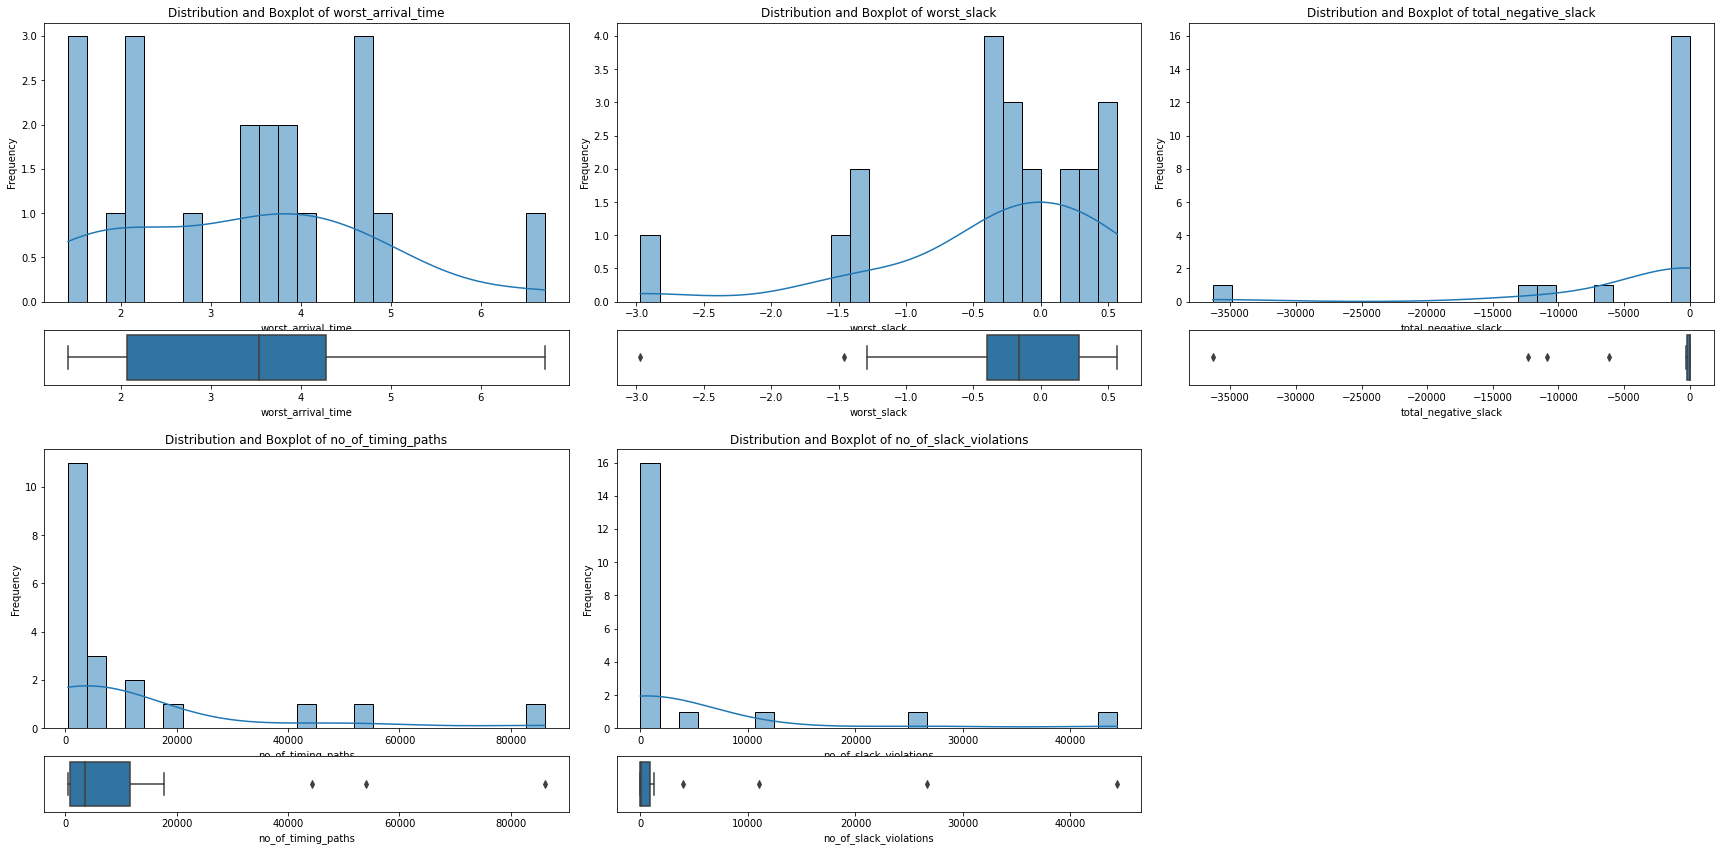

,circuit,netlist_id,phase,startpoint,endpoint,worst_arrival_time,worst_slack,total_negative_slack,no_of_timing_paths,no_of_slack_violations
0,ac97_ctrl,id-000001,detailed_route,wb_addr_i[2],_09913_,2.090608,-0.392776,-26.636886,11507.0,300.0
1,aes_core,id-000001,detailed_route,ld,_25277_,3.443474,0.244522,0.000000,3455.0,0.0
2,des3_area,id-000001,detailed_route,decrypt,desOut[26],3.819044,0.480956,0.000000,640.0,0.0
3,des3_perf,id-000001,detailed_route,decrypt,_90470_,3.478114,-1.291563,-36321.646579,44360.0,44360.0
4,ethernet,id-000001,detailed_route,wb_sel_i[0],_50302_,4.961506,-1.279044,-6187.339306,54019.0,26610.0
5,i2c,id-000001,detailed_route,_1146_,_1155_,2.071069,-0.383933,-166.836147,833.0,715.0
6,mem_ctrl,id-000001,detailed_route,_09857_,_09823_,4.784900,0.442947,0.000000,6460.0,0.0
7,pci,id-000001,detailed_route,wbs_cti_i[1],_21896_,3.773251,0.413372,0.000000,17684.0,0.0
8,sasc,id-000001,detailed_route,_635_,_525_,1.511601,0.175233,0.000000,662.0,0.0
9,simple_spi,id-000001,detailed_route,_877_,_882_,1.839676,-0.145162,-2.364093,739.0,61.0


In [7]:
critical_path_metric_df = sort_df(dataset.db.get_table_data("critical_path_metrics", phase="detailed_route"))
plot_numeric_distributions_with_boxplots(critical_path_metric_df)
critical_path_metric_df

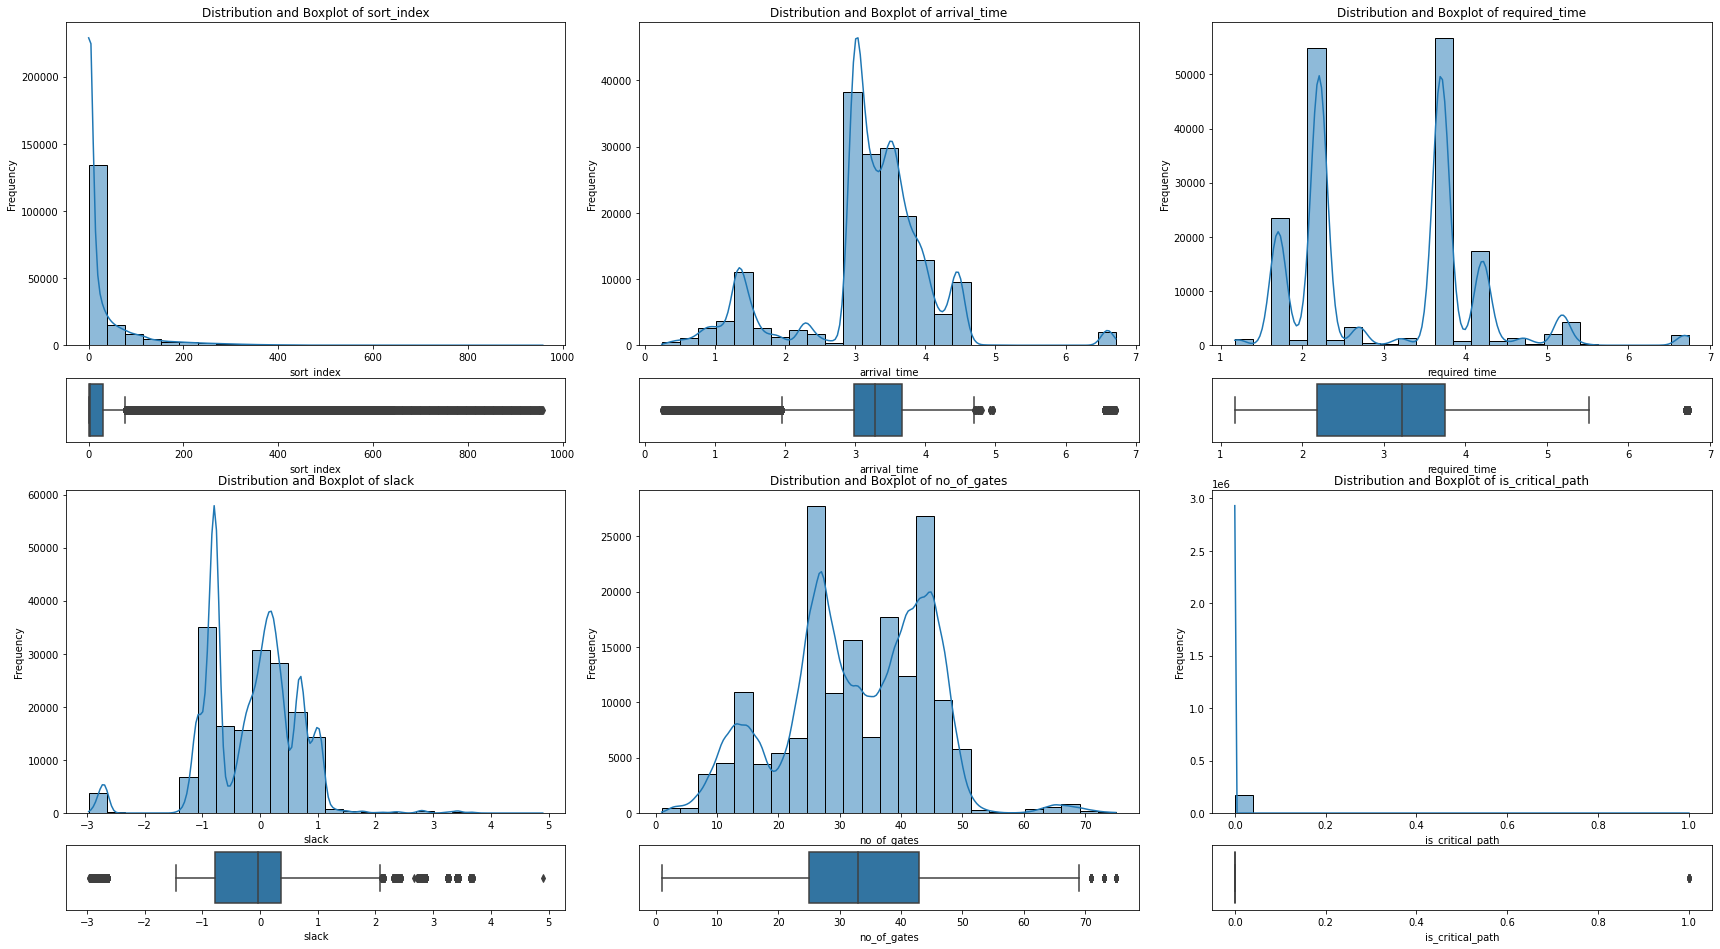

,circuit,netlist_id,phase,startpoint,endpoint,path_type,sort_index,arrival_time,required_time,slack,no_of_gates,is_critical_path
ac97_ctrl:id-000001:detailed_route,ac97_ctrl,id-000001,detailed_route,rst_i,_10083_,max,0.0,1.902144,1.942272,0.040128,15.0,0
ac97_ctrl:id-000001:detailed_route,ac97_ctrl,id-000001,detailed_route,rst_i,_10086_,max,0.0,1.902144,1.942272,0.040128,15.0,0
ac97_ctrl:id-000001:detailed_route,ac97_ctrl,id-000001,detailed_route,rst_i,_10101_,max,0.0,1.902144,1.942272,0.040128,15.0,0
ac97_ctrl:id-000001:detailed_route,ac97_ctrl,id-000001,detailed_route,rst_i,_10102_,max,0.0,1.902144,1.942272,0.040128,15.0,0
ac97_ctrl:id-000001:detailed_route,ac97_ctrl,id-000001,detailed_route,rst_i,_10104_,max,0.0,1.902144,1.942272,0.040128,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
wb_dma:id-000001:detailed_route,wb_dma,id-000001,detailed_route,_3543_,_3858_,max,1.0,2.215818,2.691449,0.475631,15.0,0
wb_dma:id-000001:detailed_route,wb_dma,id-000001,detailed_route,_3543_,_3858_,max,2.0,2.215818,2.691449,0.475631,15.0,0
wb_dma:id-000001:detailed_route,wb_dma,id-000001,detailed_route,_3543_,_3866_,max,0.0,2.215808,2.691449,0.475640,15.0,0
wb_dma:id-000001:detailed_route,wb_dma,id-000001,detailed_route,_3543_,_3866_,max,1.0,2.215808,2.691449,0.475640,15.0,0


In [8]:
timing_paths_df = dataset.db.get_table_data('timing_paths', path_type="max", phase="detailed_route")
for c in ["arrival_time", "required_time", "slack", "no_of_gates"]:
    timing_paths_df[c] = timing_paths_df[c].apply(pd.to_numeric)
timing_paths_df.index = timing_paths_df["circuit"] + ":" + timing_paths_df["netlist_id"] + ":" + timing_paths_df["phase"]
plot_numeric_distributions_with_boxplots(timing_paths_df)
timing_paths_df

In [9]:
netlist_df = sort_df(dataset.db.get_table_data("netlists"))
df = netlist_df.merge(sort_df(dataset.db.get_table_data("cell_metrics")), on=["circuit", "netlist_id", "phase"])
df = df.merge(sort_df(dataset.db.get_table_data("area_metrics")), on=["circuit", "netlist_id", "phase"])
df = df.merge(sort_df(dataset.db.get_table_data("power_metrics")), on=["circuit", "netlist_id", "phase"])
df = df.merge(sort_df(dataset.db.get_table_data("critical_path_metrics")), on=["circuit", "netlist_id", "phase"])
df = sort_df(df)
df['phase'] = df['phase'].astype(pd.CategoricalDtype(PHASES , ordered=True))

for column in df.columns[3:]:
    if column in ["startpoint", "endpoint", "path_type"]:
        continue
    df[column] = df[column].apply(pd.to_numeric)
df.index = df["circuit"] + ":" + df["netlist_id"] + ":" + df['phase'].astype(str)
df.head()

,circuit,netlist_id,phase,width,height,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets,utilization,...,switching_power,leakage_power,total_power,startpoint,endpoint,worst_arrival_time,worst_slack,total_negative_slack,no_of_timing_paths,no_of_slack_violations
ac97_ctrl:id-000001:floorplan,ac97_ctrl,id-000001,floorplan,538.24,538.24,84.0,48.0,9827.0,4015.0,31.0,...,0.000611,3.350000e-08,0.0401,_08923_,_09649_,3.088444,-1.362456,-1773.942514,11507.0,8986.0
ac97_ctrl:id-000001:global_place,ac97_ctrl,id-000001,global_place,538.24,538.24,84.0,48.0,9827.0,4015.0,31.0,...,0.000611,3.350000e-08,0.0401,_08923_,_09649_,3.088444,-1.362456,-1773.942547,11507.0,8986.0
ac97_ctrl:id-000001:detailed_place,ac97_ctrl,id-000001,detailed_place,538.24,538.24,84.0,48.0,9942.0,4131.0,33.0,...,0.000812,3.650000e-08,0.0404,_10093_,_09650_,2.022550,-0.291468,-46.839282,11507.0,380.0
ac97_ctrl:id-000001:cts,ac97_ctrl,id-000001,cts,538.24,538.24,84.0,48.0,10470.0,4662.0,36.0,...,0.009540,4.110000e-08,0.0696,wb_addr_i[31],_09941_,2.593562,-0.844002,-152.602679,11507.0,1010.0
ac97_ctrl:id-000001:global_route,ac97_ctrl,id-000001,global_route,538.24,538.24,84.0,48.0,10622.0,4799.0,37.0,...,0.009560,4.130000e-08,0.0697,wb_addr_i[2],_09913_,2.090608,-0.392776,-26.636886,11507.0,300.0


---
## Power, Performance, Area Analysis

In [10]:
columns = ["total_area", "total_power", "worst_arrival_time"]
xlabels = ["Area (µm^2)", "Power (µW)", "Arrival Time (ns)"]

routed_df = df[df.phase=="detailed_route"]
for i in range(3):
    print("Range for {}: [{} - {}]".format(xlabels[i], routed_df[columns[i]].min(), routed_df[columns[i]].max()))

Range for Area (µm^2): [4257.0 - 845030.0]
Range for Power (µW): [0.00498 - 0.762]
Range for Arrival Time (ns): [1.41438663 - 6.71601057]


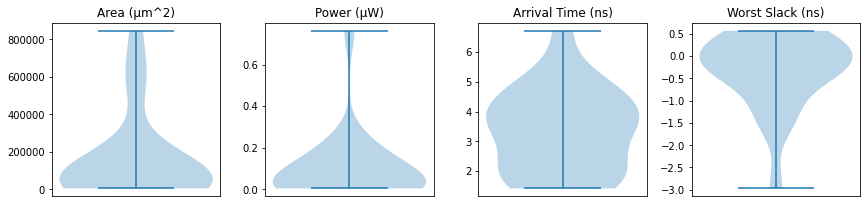

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
fig.tight_layout()

columns = ["total_area", "total_power", "worst_arrival_time", "worst_slack"]
xlabels = ["Area (µm^2)", "Power (µW)", "Arrival Time (ns)", "Worst Slack (ns)"]

for i in range(4):
    axes[i].yaxis.get_major_formatter().set_scientific(False)
    axes[i].violinplot(routed_df[columns[i]])
    axes[i].set_xlabel(xlabels[i])
    axes[i].get_xaxis().set_visible(False)
    axes[i].set_title(xlabels[i])

Text(0.5, 0.98, '')

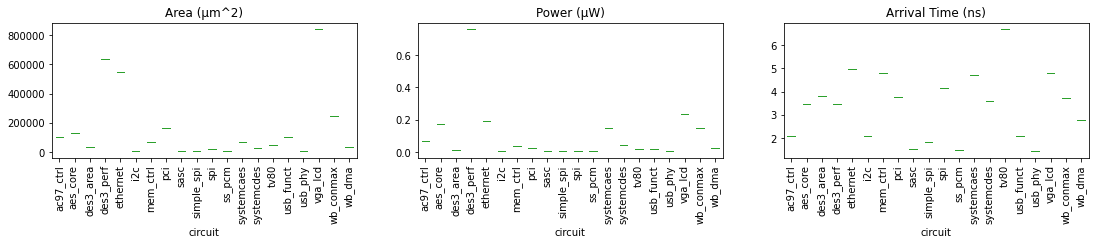

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 2.5))

columns = ["total_area", "total_power", "worst_arrival_time"]
xlabels = ["Area (µm^2)", "Power (µW)", "Arrival Time (ns)"]

for i in range(3):
    routed_df.boxplot(column=[columns[i]], by='circuit', grid=False, ax=axes[i])
    axes[i].yaxis.get_major_formatter().set_scientific(False)
    axes[i].set_title(xlabels[i])
    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

fig.suptitle('')

## Timing Path Analysis

In [13]:
critical_timing_path_df = dataset.db.get_table_data("timing_paths", is_critical_path=True, path_type="max", phase="detailed_route")
def get_min_slack(group):
    return group.loc[group['slack'].idxmin()]

critical_timing_path_df = critical_timing_path_df.groupby(["circuit", "netlist_id"]).apply(get_min_slack)
critical_timing_path_df = critical_timing_path_df.reset_index(drop=True)
critical_timing_path_df

,circuit,netlist_id,phase,startpoint,endpoint,path_type,sort_index,arrival_time,required_time,slack,no_of_gates,is_critical_path
0,ac97_ctrl,id-000001,detailed_route,wb_addr_i[2],_09913_,max,0.0,2.090608,1.697832,-0.392776,19.0,1
1,aes_core,id-000001,detailed_route,ld,_25277_,max,0.0,3.443474,3.687996,0.244522,29.0,1
2,des3_area,id-000001,detailed_route,decrypt,desOut[26],max,0.0,3.819044,4.300000,0.480956,51.0,1
3,des3_perf,id-000001,detailed_route,decrypt,_90470_,max,0.0,3.478114,2.186551,-1.291563,51.0,1
4,ethernet,id-000001,detailed_route,wb_sel_i[0],_50302_,max,0.0,4.961506,3.682463,-1.279044,31.0,1
5,i2c,id-000001,detailed_route,_1146_,_1155_,max,0.0,2.071069,1.687136,-0.383933,13.0,1
6,mem_ctrl,id-000001,detailed_route,_09857_,_09823_,max,0.0,4.784900,5.227847,0.442947,49.0,1
7,pci,id-000001,detailed_route,wbs_cti_i[1],_21896_,max,0.0,3.773251,4.186623,0.413372,25.0,1
8,sasc,id-000001,detailed_route,_635_,_525_,max,0.0,1.511601,1.686834,0.175233,9.0,1
9,simple_spi,id-000001,detailed_route,_877_,_882_,max,0.0,1.839676,1.694513,-0.145162,13.0,1


Text(0.5, 0, '')

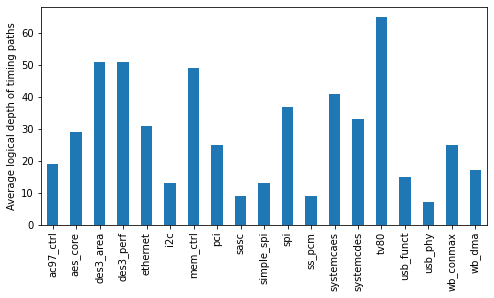

In [14]:
fig, ax = plt.subplots(1, figsize=(8, 4))
critical_timing_path_df.groupby("circuit").mean().no_of_gates.plot(kind="bar", ax=ax)
ax.set_ylabel("Average logical depth of timing paths")
ax.set_xlabel(None)

In [15]:
data = []
for circuit in CIRCUITS:
    circuit_df = routed_df[(routed_df.circuit==circuit)]
    no_of_timing_paths, no_of_slack_violations = circuit_df.no_of_timing_paths.sum(), circuit_df.no_of_slack_violations.sum()
    no_of_slack_met = no_of_timing_paths - no_of_slack_violations
    data.append([circuit, no_of_slack_met, no_of_slack_violations, no_of_timing_paths])
slack_df = pd.DataFrame(data, columns=["circuit", "no_of_slack_met", "no_of_slack_violated", "no_of_timing_paths"])
slack_df = slack_df.set_index("circuit")
slack_df.loc["total"] = slack_df.sum()
slack_df["%age_of_slack_violated"] = slack_df["no_of_slack_violated"] / slack_df["no_of_timing_paths"]
slack_df

,no_of_slack_met,no_of_slack_violated,no_of_timing_paths,%age_of_slack_violated
circuit,,,,
ac97_ctrl,11207.0,300.0,11507.0,0.026071
aes_core,3455.0,0.0,3455.0,0.000000
des3_area,640.0,0.0,640.0,0.000000
ethernet,27409.0,26610.0,54019.0,0.492604
i2c,118.0,715.0,833.0,0.858343
mem_ctrl,6460.0,0.0,6460.0,0.000000
pci,17684.0,0.0,17684.0,0.000000
sasc,662.0,0.0,662.0,0.000000
simple_spi,678.0,61.0,739.0,0.082544


<AxesSubplot:xlabel='circuit'>

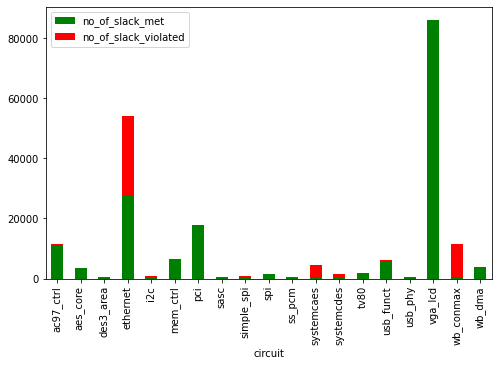

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
slack_df[slack_df.index!="total"][["no_of_slack_met", "no_of_slack_violated"]].plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)

## Inter-phase Analysis

NameError: name 'selected_df' is not defined

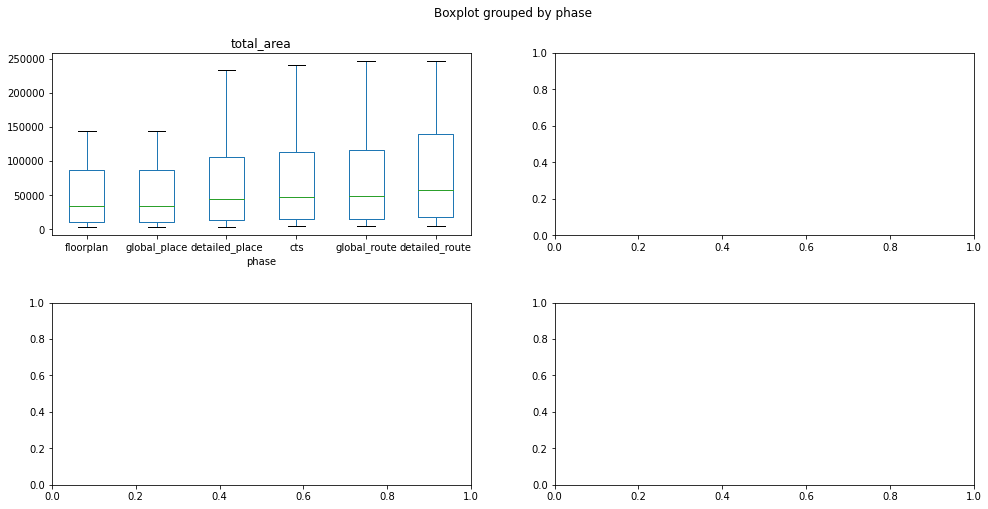

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()
fig.tight_layout(pad=5)

columns = ["total_area", "total_power", "worst_arrival_time", "worst_slack"]
xlabels = ["Area (µm^2)", "Power (µW)", "Arrival Time (ns)", "Worst Slack (ns)"]

for i, metric in enumerate(columns):
    df.boxplot(column=[metric], by="phase", grid=False, ax=axes[i], showfliers=False)
    means = selected_df.groupby("phase")[metric].mean()
    x_positions = list(range(1, len(means) + 1))
    axes[i].plot(list(range(1, len(means) + 1)), means, marker='o', color='green')
    axes[i].set_title(xlabels[i])

fig.suptitle('')